### Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

### Reading the training and testing dataset files

In [2]:
rent_df = pd.read_csv('../Data/canada_rent_clean_max5k.csv')


### Features to keep

In [3]:
kbest_15 = ['longitude', 'sq_feet', 'lease_term_6 months', 'type_Basement', 'type_House',
 'type_Room For Rent', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Ontario',
 'province_Saskatchewan', 'city_Toronto', 'city_Edmonton' ,'city_Winnipeg',
 'city_Regina', 'city_West Vancouver']

kbest_20 = ['longitude','beds', 'sq_feet', 'lease_term_6 months',
 'lease_term_Short Term', 'type_Basement', 'type_House', 'type_Room For Rent',
 'province_Manitoba', 'province_Newfoundland and Labrador',
 'province_Ontario', 'province_Saskatchewan', 'city_Calgary', 'city_Toronto',
 'city_Edmonton', 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver',
 'city_Regina', 'city_West Vancouver']

kbest_30 = ['latitude', 'longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
 'lease_term_Negotiable', 'lease_term_Short Term', 'type_Basement',
 'type_Condo Unit', 'type_House', 'type_Room For Rent',
 'smoking_Smoking Allowed', 'province_British Columbia', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Nova Scotia',
 'province_Ontario', 'province_Quebec', 'province_Saskatchewan',
 'city_Calgary', 'city_Toronto', 'city_Edmonton', 'city_Montréal',
 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver', 'city_Victoria',
 'city_Regina', 'city_West Vancouver']

corBest_30 = ['baths', 'beds', 'type_House', 'city_Toronto', 'latitude',
       'type_Room For Rent', 'province_Ontario', 'city_Edmonton',
       'type_Basement', 'province_Saskatchewan', 'longitude', 'sq_feet',
       'dogs', 'city_Vancouver', 'lease_term_Short Term', 'province_Manitoba',
       'province_British Columbia', 'city_Winnipeg', 'city_Regina',
       'city_West Vancouver', 'cats', 'city_Canmore', 'province_Nova Scotia',
       'smoking_Smoking Allowed', 'city_Halifax', 'type_Duplex',
       'lease_term_Negotiable', 'type_Condo Unit', 'lease_term_Long Term',
       'city_Victoria']

corBest_15 = corBest_30[0:15]
corBest_20 = corBest_30[0:20]


feat2keep = kbest_15

### Keep only selected features from dataset

In [4]:
# Separate independent variable from dependent variable
X = rent_df[feat2keep]
y = rent_df['price']

### Split dataset into training and testing set

In [5]:
# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Data scaling

In [6]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform only on test data
X_test_scaled = scaler.transform(X_test)

### Convert to Dataframe and reset index before calling OLS

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_train = pd.DataFrame(y_train, columns=['price']).reset_index(drop=True)

### Customize curve of features

### Train the model on training dataset

In [8]:
# Add a constant
X_train_scaled = sm.add_constant(X_train_scaled)

# Create and fit the model
model = sm.OLS(y_train, X_train_scaled).fit()

### Investigate trend (linear, polynomial, logarithmic, ...)

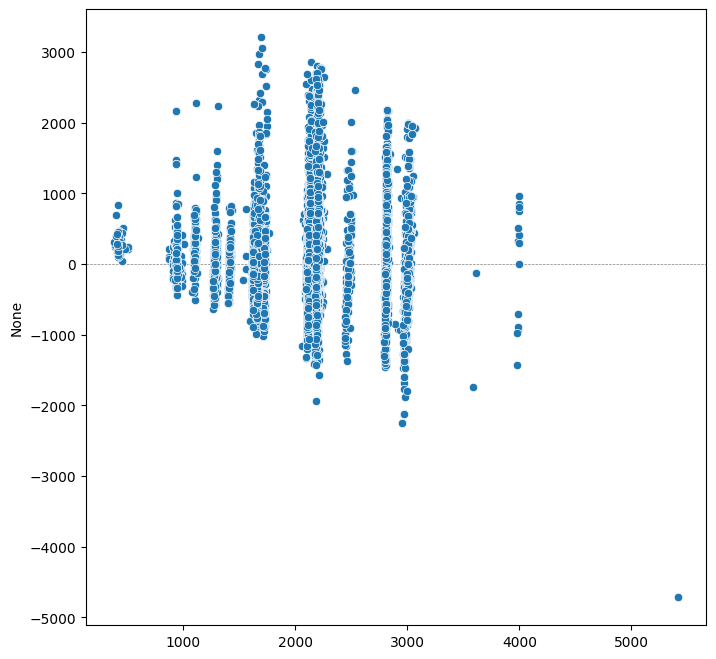

In [9]:
# Residual plot

# Create figure and adjust size
plt.figure(figsize = (8, 8))

# Add scatter plot
ax = sns.scatterplot(x=model.predict(), y=model.resid, zorder=3)

# Add grid y-axis line at 0
ax.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

In [10]:
# Summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     829.3
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:30:36   Log-Likelihood:            -1.3705e+05
No. Observations:               17682   AIC:                         2.741e+05
Df Residuals:                   17666   BIC:                         2.743e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2130.3161      4.231    503.561      0.000    2122.024    2138.608
longitude                             30.1973      6.218      4.857      0.000      18.010      42.384
sq_feet                               50.9469      4.311     11.818      0.000      42.497      59.397
lease_term_6 months                    7.7587      4.231      1.834      0.067      -0.535      16.052
type_Basement                       -148.3691      4.386    -33.828      0.000    -156.966    -139.772
type_House                           195.3925      4.403     44.377      0.000     186.762     204.023
type_Room For Rent                  -223.8033      4.359    -51.348      0.000    -232.346    -215.260
province_Manitoba                   -159.5659     17.940     -8.894      0.000    -194.730    -124.402
province_Newfoundland and Labrador   -20.7461      4.248     -4.883      0.000     -29.073     -12.419
province_Ontario                      26.4920      6.809      3.891      0.000      13.145      39.839
province_Saskatchewan               -138.4174      5.116    -27.053      0.000    -148.446    -128.389
city_Toronto                         199.5902      5.238     38.101      0.000     189.322     209.858
city_Edmonton                       -163.5571      4.449    -36.761      0.000    -172.278    -154.836
city_Winnipeg                         76.5329     17.917      4.272      0.000      41.414     111.652
city_Regina                           11.7881      5.064      2.328      0.020       1.862      21.714
city_West Vancouver                   50.2128      4.236     11.853      0.000      41.909      58.517
==============================================================================
Omnibus:                     3257.553   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9156.876
Skew:                           0.982   Prob(JB):                         0.00
Kurtosis:                       5.928   Cond. No.                         9.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
sm.stats.stattools.durbin_watson(model.resid)

np.float64(2.0119063438416913)

Text(0.5, 1.0, 'QQ plot')

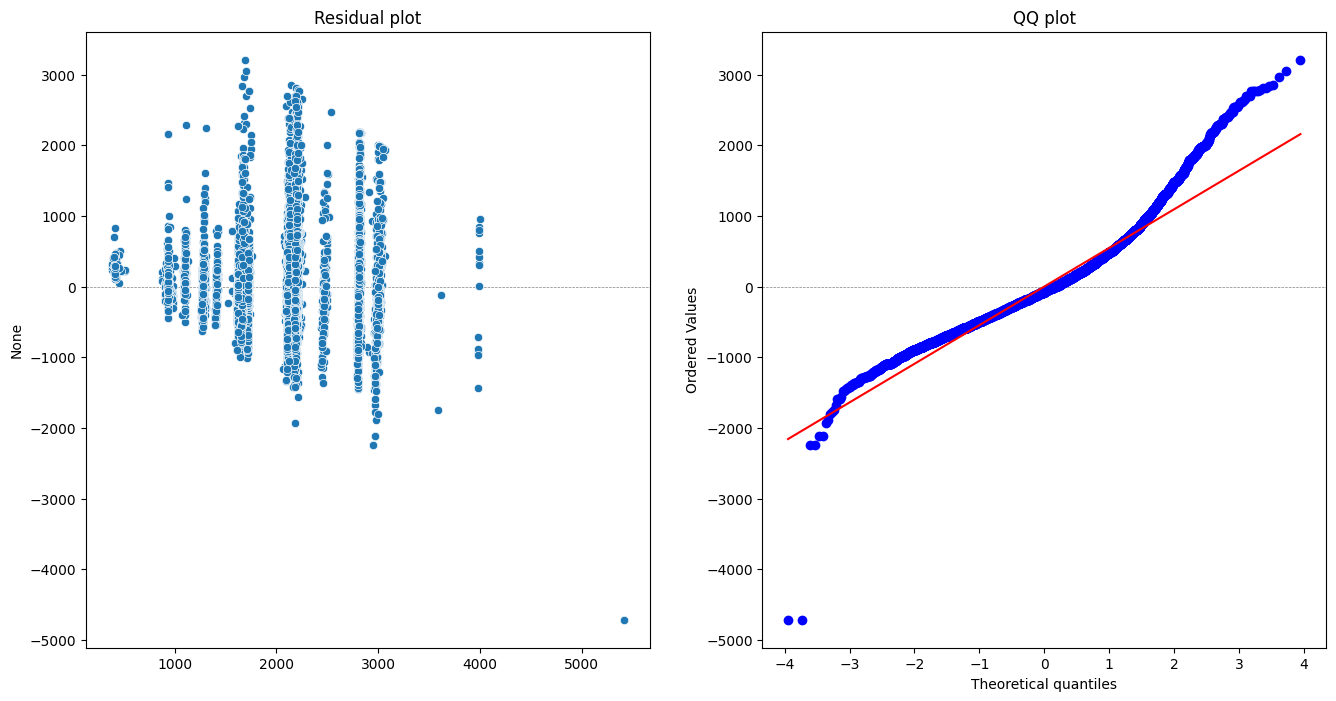

In [12]:
# Residual plot

# Create subplots and adjust their size
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (8*2, 8))

# Add scatter plot
sns.scatterplot(x=model.predict(), y=model.resid, zorder=3, ax = ax1)

# Add legend to ax1
ax1.set_title('Residual plot')

# Add grid y-axis line at 0
ax1.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add QQ plot
stats.probplot(model.resid, dist="norm", plot=ax2);

# Add grid y-axis line at 0
ax2.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add legend to ax2
ax2.set_title('QQ plot')

### Validation on testing dataset

In [15]:
# Define X and y
#X = X_test_scaled #pd.concat([X_train_scaled,X_test_scaled])

# Add a constant
#X_test_scaled = sm.add_constant(X_test_scaled)
X_test_scaled['const'] = 1.

y_pred = model.predict(X_test_scaled)
print(f"Predictions: {y_pred}")


Predictions: 0      -2889.652098
1      -2259.099741
2       1833.894973
3       1833.521238
4       2395.134589
           ...     
4416   -2694.985599
4417   -2266.984923
4418   -2644.730098
4419    1836.951371
4420   -2702.387343
Length: 4421, dtype: float64


<Axes: xlabel='price', ylabel='None'>

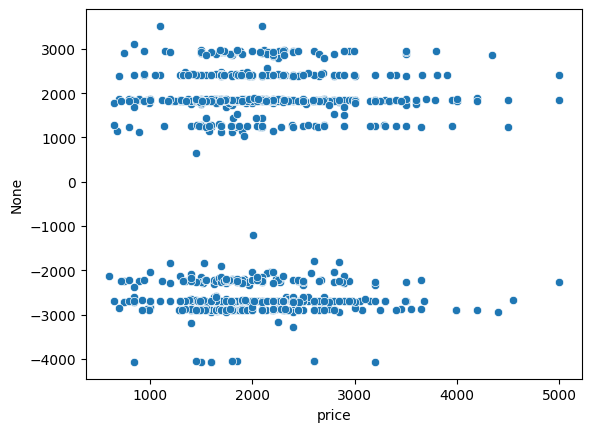

In [16]:
# Add scatter plot
sns.scatterplot(x=y_test, y=y_pred, zorder=3)


In [17]:
# Training dataset
y_pred_train = model.predict(X_train_scaled)

mae = mean_absolute_error(y_train, y_pred_train)

mse = mean_squared_error(y_train, y_pred_train)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, pd.DataFrame(y_pred, columns=['price']))

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n\
The R2 scores = {r2:.0f}')

The Mean Absolute Error = 415
The Mean Square Error = 316171
The Root Mean Square Error = 562
The R2 scores = -20


In [19]:
# Compute RMSE using model.resid ## training set 
y_pred = model.predict(X_test_scaled)
mae = np.mean(abs(model.resid))

mse = np.mean(model.resid ** 2)

rmse = np.sqrt(np.mean(model.resid ** 2))



print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n ')

The Mean Absolute Error = 415
The Mean Square Error = 316171
The Root Mean Square Error = 562
 


In [20]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n\
The R2 scores = {r2:.0f}')

The Mean Absolute Error = 2486
The Mean Square Error = 11073126
The Root Mean Square Error = 3328
The R2 scores = -20



| Regression Method   | Predictors  | Mean Absolute Error | Mean Square Error    | Root Mean Square Error | R2 scores   |
| ------------------- | ----------- | ------------------- | -------------------- | ---------------------- | ----------- |
| Linear              | SelectKBest (15) | 407                | 309293             | 556                   | 1           |
|                     | Highest corr (15)| 322                | 200112             | 447                   | 1           |
|                     | SelectKBest (20) | 345                | 226796             | 476                   | 1           |
|                     | Highest corr (20)| 316                | 194185             | 441                   | 1           |
|                     | SelectKBest (30) | 307                | 182991             | 428                   | 1           |
|                     | Highest corr (30)| 308                | 185664             | 431                   | 1           |
| Polynomial          | SelectKBest (15) | 319                | 197348             | 444                   | 1           |
|                     | Highest corr (15)| 278                | 150742             | 388                   | 1           |
|                     | SelectKBest (20) | 302                | 176505             | 420                   | 1           |
|                     | Highest corr (20)| 274                | 147937             | 385                   | 1           |
|                     | SelectKBest (30) | 263                | 134968             | 367                   | 1           |
|                     | Highest corr (30)| 266                | 138808             | 373                   | 1           |

The errors (Mean Absolute, Mean Square and Root Mean Square) are all lower for the polynomial regression model than the linear regression model. A lower error is an indication that the prediction values are closer to the true value. 

** Conclusion ** </br>
The model built from a polynomial regression with an order of 2 performs better than the linear regression model, since its predicted values are closer to the true values.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate X values
x = np.linspace(-10, 10, 400)  # Creates 400 points from -10 to 10
y = -x**2 + 10*x # Compute y = x^2

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r'$y = x^2$', color='b', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of $y = x^2$')
plt.axhline(0, color='black', linewidth=0.5)  # X-axis
plt.axvline(0, color='black', linewidth=0.5)  # Y-axis
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate X values
x = np.linspace(-10, 10, 400)  # Creates 400 points from -10 to 10
y = np.sqrt(x) # Compute y = x^2

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r'$y = x^2$', color='b', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of $y = x^2$')
plt.axhline(0, color='black', linewidth=0.5)  # X-axis
plt.axvline(0, color='black', linewidth=0.5)  # Y-axis
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid
plt.legend()
plt.show()

In [ ]:
# Define independent (X) and dependent (Y) variables
X = X['beds'] ** 2
X = sm.add_constant(X)  # Add intercept term 

# Fit OLS Model
model = sm.OLS(y, X).fit()

# Extract coefficients
intercept, slope = model.params
equation = f"y = {intercept:.4f} + {slope:.4f}x"

print("Equation of best-fit line:", equation)

In [ ]:
X_ = X['baths'] 
X_lin = sm.add_constant(X_)
model_lin = sm.OLS(y, X_lin).fit()
r2_lin = model_lin.rsquared
eq_lin = f"y = {model_lin.params[0]:.4f} + {model_lin.params[1]:.4f}x"
# Polynomial Fit (Quadratic)

X_poly = np.column_stack((X_**2, X_))  # X² and X
X_poly = sm.add_constant(X_poly)
model_poly = sm.OLS(y, X_poly).fit()
r2_poly = model_poly.rsquared
eq_poly = f"y = {model_poly.params[0]:.4f} + {model_poly.params[1]:.4f}x² + {model_poly.params[2]:.4f}x"

# Logarithmic Fit
#X_log = sm.add_constant(np.log(X))
#model_log = sm.OLS(y, X_log).fit()
#r2_log = model_log.rsquared
#eq_log = f"y = {model_log.params[0]:.4f} + {model_log.params[1]:.4f}ln(x)"

# sin Fit
X_sin = sm.add_constant(np.sin(X))
model_sin = sm.OLS(y, X_sin).fit()
r2_sin = model_sin.rsquared
eq_sin = f"y = {model_sin.params[0]:.4f} + {model_sin.params[1]:.4f}sin(x)"

# Compare R² values
print(f"Linear: R² = {r2_lin:.4f}, Equation: {eq_lin}")
print(f"Polynomial: R² = {r2_poly:.4f}, Equation: {eq_poly}")
#print(f"Logarithmic: R² = {r2_log:.4f}, Equation: {eq_log}")
print(f"Sin: R² = {r2_sin:.4f}, Equation: {eq_sin}")

# Best Fit Selection
best_fit = max((r2_lin, "Linear"), (r2_poly, "Polynomial"), (r2_sin, "sin")) #, (r2_log, "Logarithmic"))
print(f"\nBest fit: {best_fit[1]} with R² = {best_fit[0]:.4f}")